# 1. Signal and System Fundamentals for Biomedical Processing
This module establishes the core mathematical and conceptual foundations for analyzing signals, particularly those encountered in biomedical applications.
<hr>

## 1.1. Signal Definitions and Classification
A signal is a function carrying information. Bio-signals (like ECG or EEG) are often complex, requiring specific modeling techniques.

| Classification | Type | Description |
| :--- | :--- | :--- |
| **Domain** | Continuous-Time ($x(t)$) | Defined for every real value of time $t$. |
| | Discrete-Time ($x[n]$) | Defined only at discrete time steps $n$. |
| **Value** | Analog | Continuous amplitude values. |
| | Digital / Quantized | Discrete, finite set of amplitude values (bits). |
| **Prediction** | **Deterministic** | Can be precisely described by a mathematical formula. |
| | **Random (Stochastic)** | Described only by statistical properties (like bio-signals). |

### 1.1.1. Energy, Power, and Correlation
- Energy vs. Power: Signals are classified based on whether their energy ($E$) or average power ($P$) is finite.
- Autocorrelation ($R_{xx}[\tau]$): Measures the similarity of a signal with its own time-shifted version ($\tau$).
     - $R_{xx}[0]$ is equal to the signal's Energy or Power.
<hr>
## 1.2. Frequency Domain Analysis
The Fourier Transform is the fundamental tool for converting a signal from the time domain to the frequency domain, revealing its spectral components.

### 1.2.1. Transforms and Tools
- Fourier Series: Analyzes continuous, periodic signals into discrete harmonics.
- Fourier Transform (CTFT): Analyzes continuous, non-periodic signals into a continuous spectrum $X(j\omega)$.
- DFT (Discrete Fourier Transform): The practical, computational tool for analyzing discrete-time, finite-length signals.
    - The FFT (Fast Fourier Transform) is the efficient algorithm used to compute the DFT.
### 1.2.2. Sampling and Aliasing
- Sampling: The process of converting a Continuous-Time (CT) signal to a Discrete-Time (DT) signal.
- Nyquist-Shannon Theorem: To avoid information loss, the sampling rate ($f_s$) must be greater than twice the maximum frequency ($f_{\max}$) in the signal ($f_s \ge 2 f_{\max}$).
- Aliasing: Distortion that occurs when the Nyquist condition is violated, causing higher frequencies to be misinterpreted as lower ones.
<hr>

## 1.3. Random Signals and Power Spectral Density (PSD)
Since bio-signals often contain randomness, they must be treated as Random Processes.
### 1.3.1. Stationarity and Ergodicity
- Wide Sense Stationary (WSS):A process is WSS if its mean is constant and its autocorrelation depends only on the time difference ($\tau$). This condition simplifies spectral analysis.
- Ergodicity: A property allowing the estimation of statistical ensemble averages (like the mean) using the time average of a single, long realization of the signal.
### 1.3.2. Power Spectral Density (PSD)
- For WSS processes, the PSD ($S_x(\omega)$) is the Fourier Transform of the Autocorrelation function ($R_{xx}[\tau]$) (Wiener-Khinchin Theorem).
- Significance: It shows how the signal's power is distributed across different frequencies.
<hr>

## 1.4. System Fundamentals
Systems, like filters used in signal processing, are often modeled as Linear Time-Invariant (LTI) systems.
- LTI Systems: Characterized by Linearity (superposition) and Time-Invariance.
- Impulse Response ($h[n]$): The output of an LTI system to a unit impulse input; it completely defines the system.
- Convolution: The operation that finds the output ($y[n]$) of an LTI system given the input ($x[n]$) and the impulse response ($h[n]$):$$y[n] = x[n] * h[n]$$
- Frequency Domain Analysis: The complexity of convolution in the time domain simplifies to multiplication in the frequency domain: $Y(\omega) = X(\omega) H(\omega)$, where $H(\omega)$ is the system's Transfer Function.
<hr>

## Python Implementation: DFT and Spectrum Visualization
This code demonstrates how to use the FFT to analyze the frequency content of a time-domain signal, a practical necessity in bio-signal processing.

In [25]:
# CODE CELL 1 : Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft , fftfreq

In [29]:
# CODE CELL 2 : Generating a test signal (sum of two distinct sinusoids)
fs = 1000 # Sampling frequency (Hz)
T = 1/fs # Sampling period (0.001 s)
L = 1500 # Length of signal (number of samples)
t = np.arange(L) * T
f1 = 50 # First frequency (Hz)
f2 = 120 # Second frequency (Hz)
S = 0.7 * np.sin(2* np.pi * f1 *t)+ 1.0 * np.sin(2 * np.pi * f2 * t)

In [31]:
# CODE CELL 3 : Compute the Discrete Fourier Transform (DFT)
Y =fft(S)
P2 = np.abs(Y/L)
P1 = P2[0:L//2]
f = fftfreq(L, T)[:L//2]# Create frequency axis

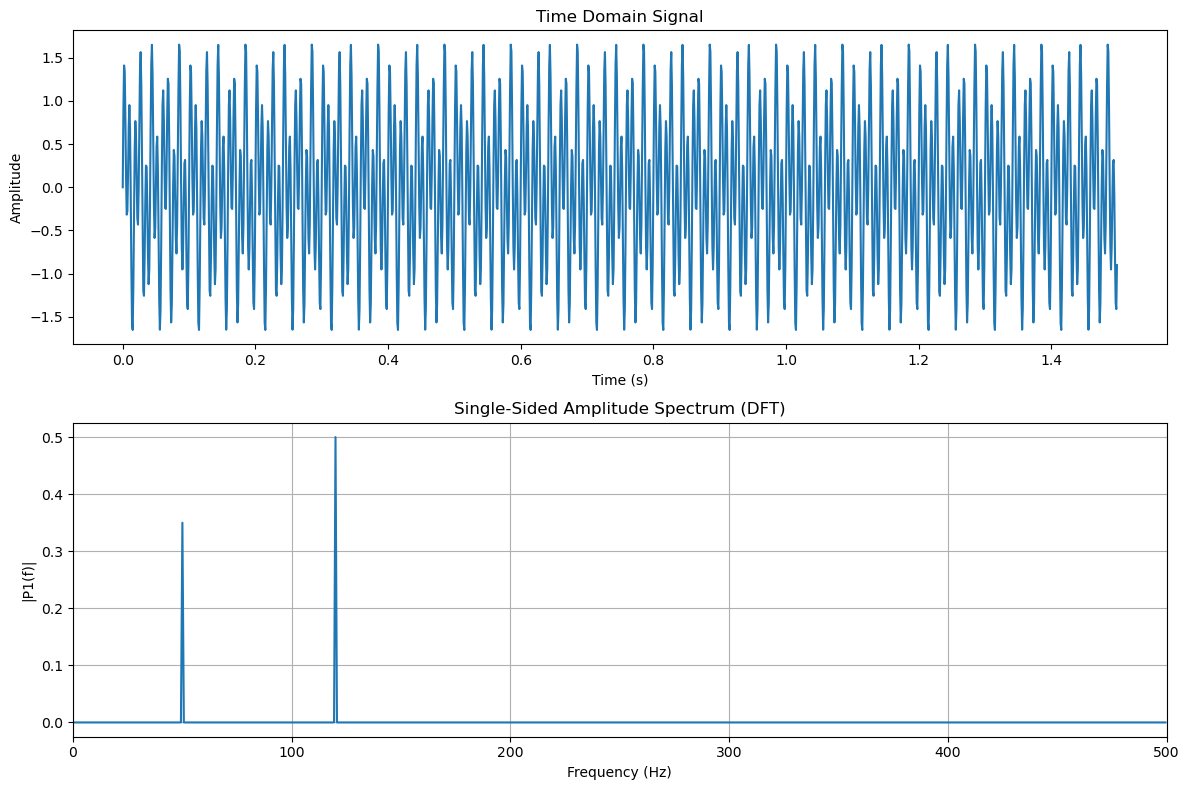

In [35]:
# CODE CELL 4 : Plotting the results
fig, axes = plt.subplots( 2, 1, figsize=(12,8))

# Time Domain Plot 
axes[0].plot(t, S)
axes[0].set_title('Time Domain Signal')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')


# Frequency Domain Plot (Spectrum)
axes[1].plot(f, P1)
axes[1].set_title('Single-Sided Amplitude Spectrum (DFT)')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('|P1(f)|')
axes[1].set_xlim([0, fs/2]) # Display up to the Nyquist frequency
axes[1].grid(True)
plt.tight_layout()
plt.show()
